In [150]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [173]:
df1=pd.read_csv('Motor DE_AD3291_20240626080128_.csv')
df2=pd.read_csv('Motor DE_AD3291_20240626084430_.csv')
first=df1[' Horizontal (g) ']
second=df2[' Horizontal (g) ']
first

0        0.975889
1        1.741514
2        2.143467
3        1.777402
4        1.564463
           ...   
31995    1.990342
31996    1.081162
31997    0.640928
31998    0.808408
31999    0.841904
Name:  Horizontal (g) , Length: 32000, dtype: float64

In [174]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row=[[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label=df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [175]:
WINDOW_SIZE=35
X,y=df_to_X_y(first,WINDOW_SIZE)

WINDOW_SIZE2=35
X2,y2=df_to_X_y(second,WINDOW_SIZE2)
X2.shape,y2.shape

((31965, 35, 1), (31965,))

In [177]:
X_train, y_train = X[:30000], y[:30000]
X_val, y_val = X[30000:32000], y[30000:32000]
X_test, y_test = X2[:], y2[:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((30000, 35, 1), (30000,), (1965, 35, 1), (1965,), (31965, 35, 1), (31965,))

In [178]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 64)                16896     
                                                                 
 dense_28 (Dense)            (None, 8)                 520       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [180]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [181]:
model1.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
938/938 [==============================] - 25s 25ms/step - loss: 0.1687 - root_mean_squared_error: 0.4107 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1979
Epoch 2/10
938/938 [==============================] - 22s 24ms/step - loss: 0.0432 - root_mean_squared_error: 0.2078 - val_loss: 0.0378 - val_root_mean_squared_error: 0.1944
Epoch 3/10
938/938 [==============================] - 19s 21ms/step - loss: 0.0421 - root_mean_squared_error: 0.2052 - val_loss: 0.0392 - val_root_mean_squared_error: 0.1980
Epoch 4/10
938/938 [==============================] - 17s 19ms/step - loss: 0.0413 - root_mean_squared_error: 0.2032 - val_loss: 0.0437 - val_root_mean_squared_error: 0.2091
Epoch 5/10
938/938 [==============================] - 23s 24ms/step - loss: 0.0381 - root_mean_squared_error: 0.1952 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1891
Epoch 6/10
938/938 [==============================] - 21s 23ms/step - loss: 0.0368 - root_mean_squared_error: 0.1917 - val_loss: 0

In [182]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [188]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

938/938 [==============================] - 7s 7ms/step


,Train Predictions,Actuals
0,0.713465,0.645713
1,0.163939,0.258115
2,0.603718,0.794053
3,1.179718,1.313242
4,1.228560,1.301279
...,...,...
29995,-1.664117,-2.244521
29996,-2.589139,-2.431142
29997,-2.090497,-2.266055
29998,-2.149281,-2.337832


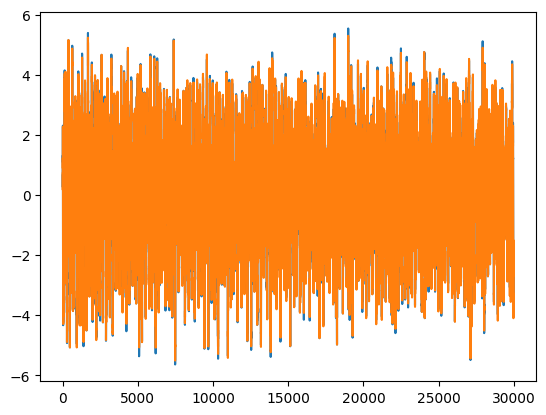

In [189]:
import matplotlib.pyplot as plt
plt.plot(train_results['Actuals'])
plt.plot(train_results['Train Predictions'])

In [193]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val})
val_results

62/62 [==============================] - 0s 7ms/step


,Train Predictions,Actuals
0,-2.885861,-2.773281
1,-2.404155,-2.380898
2,-2.089335,-1.959805
3,-1.706872,-1.524355
4,-1.337567,-1.320986
...,...,...
1960,2.258309,1.990342
1961,1.300451,1.081162
1962,0.815093,0.640928
1963,1.046755,0.808408


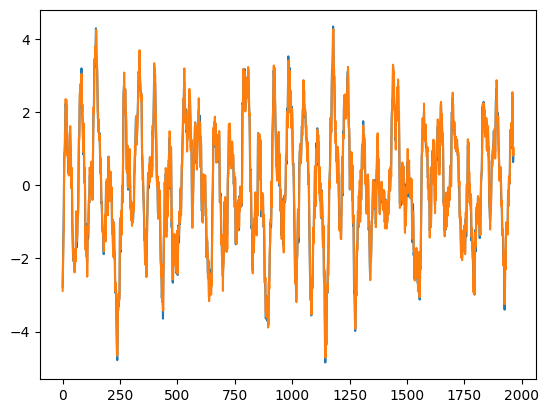

In [194]:
import matplotlib.pyplot as plt
plt.plot(val_results['Actuals'])
plt.plot(val_results['Train Predictions'])

In [190]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

999/999 [==============================] - 7s 7ms/step


,Test Predictions,Actuals
0,-3.329942,-3.415481
1,-2.937994,-2.886722
2,-2.339810,-2.130667
3,-1.866462,-1.721536
4,-1.765894,-1.932083
...,...,...
31960,1.929176,2.039597
31961,2.149959,2.044382
31962,2.145447,2.032419
31963,2.155507,2.324313


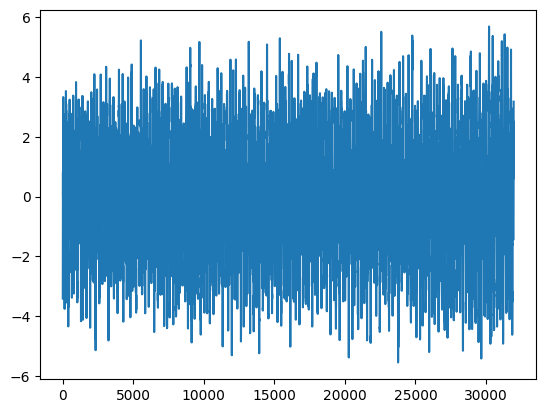

In [191]:
plt.plot(test_results['Actuals'])

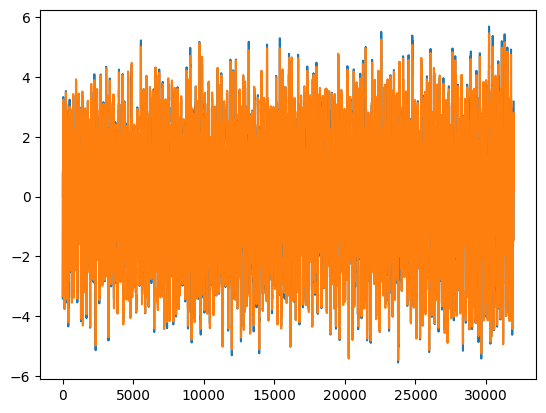

In [192]:
plt.plot(test_results['Actuals'])
plt.plot(test_results['Test Predictions'])